In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv (r'C:/Users/44789/OneDrive/Desktop/Py test_MS/Gilts.csv')

In [3]:
#Question 1
df.index.name = 'Num'
df = df.rename(columns={"Unnamed: 5": "Proceeds"})
Dates = df[["Gilt Purchases", "Proceeds"]]

In [4]:
type(Dates)
Dates = Dates.loc[1:]

In [5]:
Dates['Proceeds'] = Dates['Proceeds'].astype(float)

In [6]:
Dates = Dates[Dates['Proceeds'] > 0]

In [7]:
Dates = Dates[['Gilt Purchases']]

In [8]:
idx = pd.Index(range(len(Dates.index)))

In [9]:
Dates = Dates.set_index(idx)
Dates.index.name = 'Num'

In [10]:
Dates['Gilt Purchases'] = pd.to_datetime(Dates['Gilt Purchases'], format='%d/%m/%Y')

In [11]:
#start_date
start_date = Dates.iloc[1]['Gilt Purchases'] 
start_date

Timestamp('2009-03-11 00:00:00')

In [12]:
#end_date
end_date = Dates['Gilt Purchases'].iloc[len(Dates.index) - 1]
end_date

Timestamp('2021-12-15 00:00:00')

In [13]:
#Sample = pd.date_range("2012-09-09", periods = 31, freq = "D" )
Difference = Dates['Gilt Purchases'].loc[10] - Dates['Gilt Purchases'].loc[5]
#Difference.days
 

In [14]:
Dates["QE_Dates"] = ""

In [15]:
counter = 0
for n in range((end_date - start_date).days):
    Difference = Dates['Gilt Purchases'].loc[n+1] - Dates['Gilt Purchases'].loc[n]
    Diff = Difference.days
    if Diff > 31:
        Dates.loc[n+1, ["QE_Dates"]] = Dates['Gilt Purchases'].loc[n+1]
        counter = counter + 1
    else:
        continue
print ("The QE periods applied by Boe have been:", counter)


The QE periods applied by Boe have been: 18


In [16]:
Dates.QE_Dates.unique()

array(['', Timestamp('2011-10-10 00:00:00'),
       Timestamp('2012-07-09 00:00:00'), Timestamp('2013-03-11 00:00:00'),
       Timestamp('2013-09-30 00:00:00'), Timestamp('2014-03-10 00:00:00'),
       Timestamp('2014-09-08 00:00:00'), Timestamp('2015-01-26 00:00:00'),
       Timestamp('2015-09-07 00:00:00'), Timestamp('2015-12-07 00:00:00'),
       Timestamp('2016-01-25 00:00:00'), Timestamp('2016-08-08 00:00:00'),
       Timestamp('2017-09-04 00:00:00'), Timestamp('2018-03-12 00:00:00'),
       Timestamp('2018-07-23 00:00:00'), Timestamp('2019-03-11 00:00:00'),
       Timestamp('2019-07-22 00:00:00'), Timestamp('2019-09-09 00:00:00'),
       Timestamp('2020-03-09 00:00:00')], dtype=object)

In [17]:
QE_df = Dates

In [18]:
#Question 2
#Plot the total amount of QE purchases per week

In [19]:
# Construct dataframe with week number column and values column
import matplotlib.pyplot as plt

df = pd.read_csv (r'C:/Users/44789/OneDrive/Desktop/Py test_MS/Gilts.csv')
#df = pd.read_excel(file_name)

df = df.rename(columns={"Unnamed: 5": "Proceeds"})
Dates = df[["Gilt Purchases", "Proceeds"]]
type(Dates)
Dates = Dates.iloc[1:]
Dates['Proceeds'] = Dates['Proceeds'].astype(float)

In [20]:
matplotlib inline

In [21]:
#Dates["Proceeds"]

In [22]:
PpW = Dates.loc[:, ["Proceeds"]]
PpW["Week_no"] = pd.to_datetime(Dates["Gilt Purchases"], format='%d/%m/%Y').dt.isocalendar().week


In [23]:
# Sum up weekly values
PpW_f = (PpW.groupby("Week_no").sum().reset_index())
type(PpW_f)

pandas.core.frame.DataFrame

In [24]:
#PpW_f

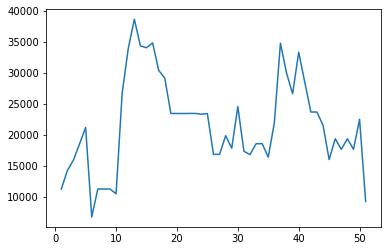

In [25]:
# Plot results
plt.plot(PpW_f["Week_no"], PpW_f["Proceeds"])


In [26]:
#Question 3

In [27]:
df = pd.read_csv (r'C:/Users/44789/OneDrive/Desktop/Py test_MS/Gilts.csv')

In [28]:
df = df.rename(columns={"Unnamed: 5": "Proceeds", "Unnamed: 3": "Bonds"})

Dates = df[["Gilt Purchases", "Bonds", "Proceeds"]]
Dates = Dates.iloc[1:]

In [29]:
Dates['Proceeds'] = Dates['Proceeds'].astype(float)

In [30]:
Dates = Dates[Dates['Proceeds'] > 0]

In [31]:
idx = pd.Index(range(len(Dates.index)))

In [32]:
Dates = Dates.set_index(idx)

In [33]:
Dates["QE_Periods"] = ""

In [34]:
QE = QE_df[["QE_Dates"]]

In [35]:
Dates["QE_Periods"] = QE["QE_Dates"]

In [36]:
Dates.QE_Periods.unique()

array(['', Timestamp('2011-10-10 00:00:00'),
       Timestamp('2012-07-09 00:00:00'), Timestamp('2013-03-11 00:00:00'),
       Timestamp('2013-09-30 00:00:00'), Timestamp('2014-03-10 00:00:00'),
       Timestamp('2014-09-08 00:00:00'), Timestamp('2015-01-26 00:00:00'),
       Timestamp('2015-09-07 00:00:00'), Timestamp('2015-12-07 00:00:00'),
       Timestamp('2016-01-25 00:00:00'), Timestamp('2016-08-08 00:00:00'),
       Timestamp('2017-09-04 00:00:00'), Timestamp('2018-03-12 00:00:00'),
       Timestamp('2018-07-23 00:00:00'), Timestamp('2019-03-11 00:00:00'),
       Timestamp('2019-07-22 00:00:00'), Timestamp('2019-09-09 00:00:00'),
       Timestamp('2020-03-09 00:00:00')], dtype=object)

In [37]:
df = Dates.set_index(keys = ["QE_Periods", "Bonds"])

In [38]:
Dates.groupby(["QE_Periods", "Bonds"])["Proceeds"].sum()

QE_Periods           Bonds          
2011-10-10 00:00:00  UKT_2.75_220115      117.057828
2012-07-09 00:00:00  UKT_4.75_070915       28.932612
2013-03-11 00:00:00  UKT_4_070916         106.740380
2013-09-30 00:00:00  UKT_1.75_220117      118.330381
2014-03-10 00:00:00  UKT_8.75_250817       23.890105
                                            ...     
                     UKT_6_071228       11893.528404
                     UKT_8.75_250817     6489.260441
                     UKT_8_070621       16401.024315
                     UKT_8_071215        6266.558482
                     UKT_8_270913        1912.948123
Name: Proceeds, Length: 97, dtype: float64